In [1]:
from __future__ import division
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set()
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skyfield.api import Topos, load

In [3]:
import skyfield
print(skyfield.__file__)

/home/brandon/skyfield/skyfield/__init__.py


In [4]:
ts = load.timescale(builtin=True)
t = ts.utc(2017, 4, 6, 0, range(24 * 60))
eph = load('de421.bsp')
site = Topos('22.959748 S', '67.787260 W', elevation_m=5186.0)
place = eph['earth'] + site

In [5]:
astrometric = place.at(t).observe(eph['moon'])
apparent = astrometric.apparent()

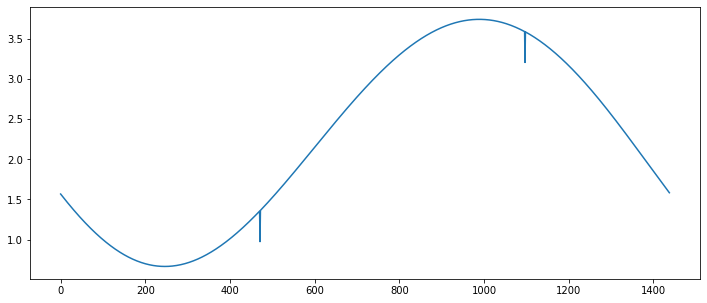

In [6]:
ra1, dec1, distance1 = astrometric.radec()
ra2, dec2, distance2 = apparent.radec()

diff_degrees = np.diff(ra2._degrees - ra1._degrees)
plot(diff_degrees * 3600.0 * 1e3)

(440.0, 500.0)

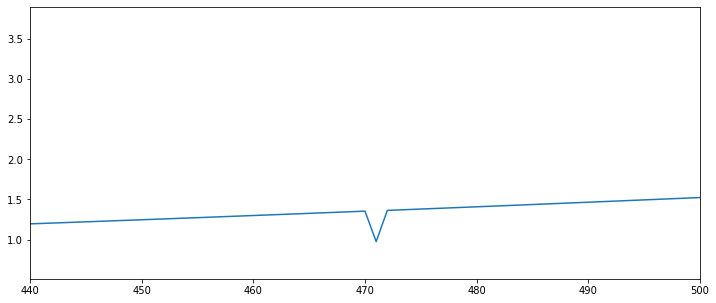

In [7]:
ax, = plot(diff_degrees * 3600.0 * 1e3)
plt.xlim(440, 500)